In [5]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
df = pd.read_excel('input/Dummy.xlsx')

In [7]:
df.head()

,MQ2,MQ3,MQ4,MQ5,MQ6,MQ7,MQ8,MQ135,Label
0,6,148,72,35,0,33.6,0.627,50,3
1,1,85,66,29,0,26.6,0.351,31,3
2,8,183,64,0,0,23.3,0.672,32,3
3,1,89,66,23,94,28.1,0.167,21,2
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
#Menghilangkan kolom tertentu
#Dalam hal ini kolom Label yang berisi data tipe string
df_drop = df.drop(labels=['Label'], axis = 1)
df_drop.head()

,MQ2,MQ3,MQ4,MQ5,MQ6,MQ7,MQ8,MQ135
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [9]:
cols = df_drop.columns.tolist()
cols

['MQ2', 'MQ3', 'MQ4', 'MQ5', 'MQ6', 'MQ7', 'MQ8', 'MQ135']

In [10]:
x = df_drop.iloc[:, :].values
x

array([[6.00e+00, 1.48e+02, 7.20e+01, ..., 3.36e+01, 6.27e-01, 5.00e+01],
       [1.00e+00, 8.50e+01, 6.60e+01, ..., 2.66e+01, 3.51e-01, 3.10e+01],
       [8.00e+00, 1.83e+02, 6.40e+01, ..., 2.33e+01, 6.72e-01, 3.20e+01],
       ...,
       [2.00e+00, 8.10e+01, 7.20e+01, ..., 3.01e+01, 5.47e-01, 2.50e+01],
       [7.00e+00, 1.95e+02, 7.00e+01, ..., 2.51e+01, 1.63e-01, 5.50e+01],
       [6.00e+00, 1.54e+02, 7.40e+01, ..., 2.93e+01, 8.39e-01, 3.90e+01]])

Data Standardisation :

In [11]:
from sklearn.preprocessing import StandardScaler
x_std = StandardScaler().fit_transform(x)
x_std

array([[ 0.65618344,  0.82013306,  0.16718959, ...,  0.19778399,
         0.40819719,  1.45499222],
       [-0.84058535, -1.12374891, -0.14184847, ..., -0.65641636,
        -0.39130339, -0.18060429],
       [ 1.25489095,  1.90006748, -0.24486116, ..., -1.05911081,
         0.53855054, -0.09452026],
       ...,
       [-0.54123159, -1.24716999,  0.16718959, ..., -0.22931619,
         0.17645789, -0.69710845],
       [ 0.9555372 ,  2.27033072,  0.06417691, ..., -0.83945929,
        -0.93589074,  1.88541235],
       [ 0.65618344,  1.00526467,  0.27020228, ..., -0.32693908,
         1.02230632,  0.50806793]])

Computing Eigenvectors and Eigenvalues :

In [12]:
mean_vec = np.mean(x_std, axis=0)
cov_mat = (x_std - mean_vec).T.dot((x_std - mean_vec))/ (x_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)
print('\nNumPy covariance matrix: \n%s' %np.cov(x_std.T))

Covariance matrix 
[[ 1.00200401  0.18866292  0.12379339 -0.06766834 -0.04897345  0.04304528
  -0.04059261  0.52976921]
 [ 0.18866292  1.00200401  0.11238286  0.02342433  0.34157525  0.23732444
   0.16320011  0.31634974]
 [ 0.12379339  0.11238286  1.00200401  0.20054981  0.08622582  0.25431754
   0.00551753  0.20957431]
 [-0.06766834  0.02342433  0.20054981  1.00200401  0.45422971  0.38894021
   0.16585781 -0.13586394]
 [-0.04897345  0.34157525  0.08622582  0.45422971  1.00200401  0.21102667
   0.20826593 -0.00500808]
 [ 0.04304528  0.23732444  0.25431754  0.38894021  0.21102667  1.00200401
   0.12777565  0.04532225]
 [-0.04059261  0.16320011  0.00551753  0.16585781  0.20826593  0.12777565
   1.00200401  0.04262205]
 [ 0.52976921  0.31634974  0.20957431 -0.13586394 -0.00500808  0.04532225
   0.04262205  1.00200401]]

NumPy covariance matrix: 
[[ 1.00200401  0.18866292  0.12379339 -0.06766834 -0.04897345  0.04304528
  -0.04059261  0.52976921]
 [ 0.18866292  1.00200401  0.11238286  0.023

Text(0.5, 1.0, 'Correlation between different features')

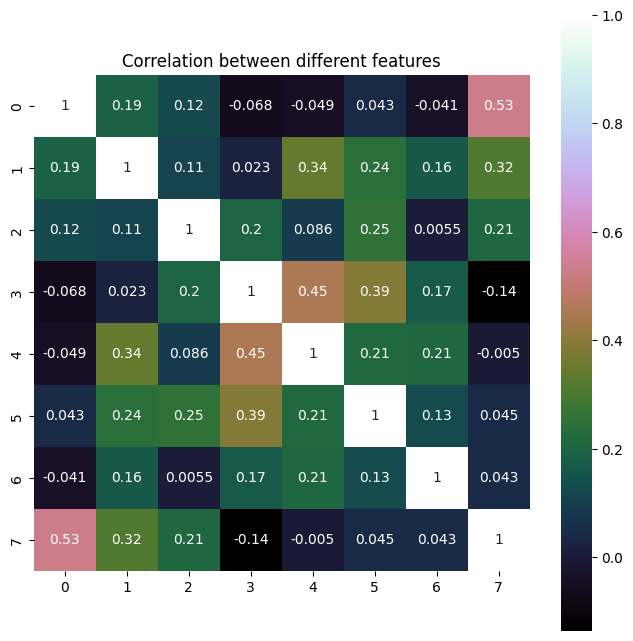

In [13]:
plt.figure(figsize=(8,8))
sns.heatmap(cov_mat, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation between different features')

In [14]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.19051812  0.5644392   0.14323361  0.55719958  0.06690951 -0.20532102
  -0.51718758 -0.00272051]
 [ 0.41730484  0.20901519 -0.42024831  0.26621928 -0.39557044 -0.01566573
   0.50912033 -0.34462018]
 [ 0.32257817  0.10857244  0.06849417  0.18625169  0.59389588  0.5787138
   0.30269156  0.25598835]
 [ 0.40350721 -0.40142714 -0.61659121 -0.06166806  0.2348189  -0.02889576
  -0.48463005 -0.03477574]
 [ 0.44519605 -0.26425192  0.55713966 -0.08478701 -0.27116424  0.3438213
  -0.23085644 -0.41150957]
 [ 0.44013937 -0.14016047  0.3142362  -0.12352601  0.30189287 -0.70504738
   0.28169727  0.07102713]
 [ 0.26199186 -0.14138559  0.03783197  0.09296467 -0.51421831  0.03896106
  -0.03333975  0.79639608]
 [ 0.24924454  0.59609178 -0.08613403 -0.74099483 -0.04588127  0.07092516
  -0.11430414  0.07654045]]

Eigenvalues 
[2.10378174 1.7256891  0.3736042  0.42763279 1.08933084 0.7124765
 0.74958579 0.83393111]


Selecting Principal Components

In [15]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
2.1037817375199523
1.7256891025216015
1.0893308380051858
0.8339311078654823
0.7495857904710208
0.7124765014882368
0.42763278663861226
0.3736041996181655


In [16]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]

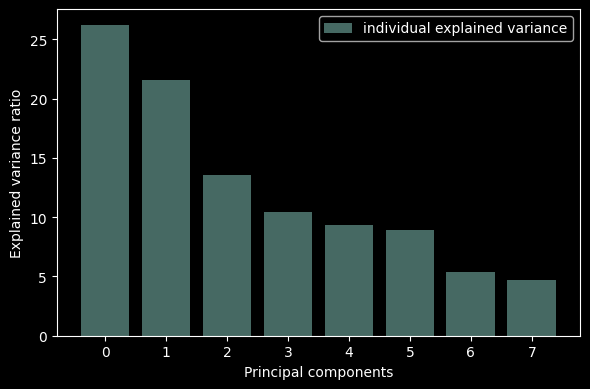

In [18]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(8), var_exp, alpha=0.5, align='center',label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [20]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(8,1), eig_pairs[1][1].reshape(8,1)))
print('Matrix W:\n', matrix_w)

Y = x_std.dot(matrix_w)
Y

Matrix W:
 [[ 0.19051812  0.5644392 ]
 [ 0.41730484  0.20901519]
 [ 0.32257817  0.10857244]
 [ 0.40350721 -0.40142714]
 [ 0.44519605 -0.26425192]
 [ 0.44013937 -0.14016047]
 [ 0.26199186 -0.14138559]
 [ 0.24924454  0.59609178]]


array([[ 1.14807411e+00,  1.15157101e+00],
       [-1.19529698e+00, -7.21879710e-01],
       [-2.25092086e-01,  1.79964680e+00],
       [-1.22188122e+00, -1.21369783e+00],
       [ 2.16377625e+00, -2.19828252e+00],
       [-1.36956880e+00,  9.67505113e-01],
       [-9.81752757e-01, -1.07929351e+00],
       [-1.87810081e+00,  1.20229190e+00],
       [ 3.33719880e+00, -2.75490625e-01],
       [-1.55355708e+00,  3.31216791e+00],
       [-5.67864657e-01,  6.59354359e-01],
       [ 5.91968490e-01,  2.00325965e+00],
       [ 9.12370700e-01,  2.84619601e+00],
       [ 3.86236867e+00, -4.42165842e-01],
       [ 1.13487388e+00,  1.32244462e+00],
       [-2.19700859e+00,  6.99898468e-01],
       [ 1.97321946e+00, -1.95599046e+00],
       [-1.09487138e+00,  1.20858920e+00],
       [-2.09092268e-01, -1.33479263e+00],
       [ 2.26597636e-01, -9.02060441e-01],
       [ 1.85933268e+00, -1.38947472e+00],
       [-1.53824439e-01,  2.20276824e+00],
       [ 1.22883994e+00,  2.13004488e+00],
       [ 1.

C:\Users\putri\AppData\Local\Temp\ipykernel_11700\2240309056.py:4: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(0,8,1)


Text(0, 0.5, 'Cumulative explained variance')

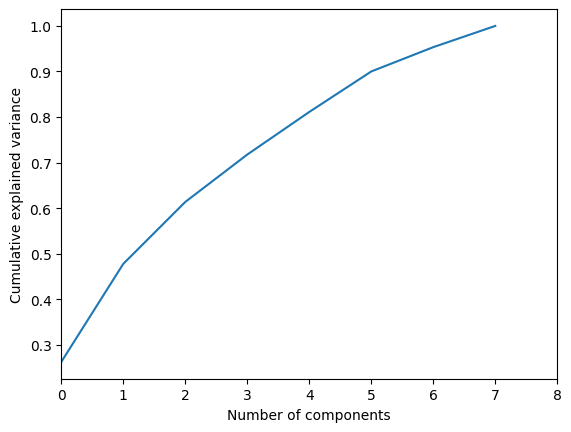

In [21]:
from sklearn.decomposition import PCA
pca = PCA().fit(x_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,8,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [22]:
from sklearn.decomposition import PCA 
sklearn_pca = PCA(n_components=7)
Y_sklearn = sklearn_pca.fit_transform(x_std)
Y_sklearn

array([[ 1.14807411e+00,  1.15157101e+00,  1.05614201e-05, ...,
         2.84514610e-01,  3.29353903e-01,  4.48974901e-01],
       [-1.19529698e+00, -7.21879710e-01, -6.23774513e-01, ...,
         4.35388631e-01, -2.95714383e-01,  5.91300480e-01],
       [-2.25092086e-01,  1.79964680e+00,  1.53082181e+00, ...,
        -7.30230150e-01, -1.38120647e-01, -1.54843976e+00],
       ...,
       [-9.59162528e-01, -8.03010096e-01, -3.55159745e-01, ...,
         1.13493177e-01, -3.43569874e-01,  1.59069170e-02],
       [ 1.56380872e+00,  1.93533539e+00,  6.15105037e-01, ...,
         2.46809931e-01, -6.56695827e-01,  3.25957516e-01],
       [ 1.59354134e+00,  2.74154626e-01,  9.25125551e-01, ...,
         4.98916640e-01, -6.14243912e-01, -3.18080909e-01]])

In [23]:
Y_sklearn.shape

(500, 7)